# Метод двойственных усреднений

## Бабушкина Татьяна, 673 группа

Минимизируем функцию на выпуклом множестве $Q = \mathbb{R}^{n}$

Шаг метода:

$$ x_{k+1} = argmin_{\mathbb{R}^{n}} \{ d(x) + <\sum_{i=1}^{k} h_i \nabla f(x_i), x>\}$$

где $d(x) = \frac{1}{2} \sum_{i=0}^{n} x_{i}^{2}$ -- прокс-функция

Заметим, что $j$-ая компонента $x_{k+1}$ будет равна $- \sum_{i=1}^{k} h_i \nabla f(x_i)$

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#Вход: функция градиента оптимизирумой функции, критерий останова, шаг h_i, точка старта
#Выход: последовательность точек x_k -- решений задачи оптимизации

def DoDual (gradient, eps, step, x_start):
    i = 0 
    x = x_start #точка старта
    y = 10e29
    res = [x_start] #инициализируем массив итеррационных точек
    grad = np.zeros(len(x_start)) #инициализуруем нулевой массив размерности начальной точки. Каждый раз обновляем вектор-градиент
    while (np.linalg.norm (y-x, ord = 2) > eps): #условие останова
        grad = grad + step(i) * gradient (x) #считаем градиент
        res.append (-grad) #добавляем градиент в массив решений
        y = x
        x = res[i+1] #обновляем точку 
        i = i + 1 
    return res

In [29]:
#Определим функцию шага h_i = 1/k

def step(i):
    eig, v = np.linalg.eig (A.transpose() @ A) #вычисляем собственные числа и векторы квадратной матрицы A^{T} A
    e = max (eig) #находим максимальное собственное число матрицы A^{T} A
    return 1/e


# Пример 1. Когда всё получилось:)

Наша задача: тестироваться на функциях вида:

$$ ||Ax - b||_{2}^{2} - \lambda_{min} (A^{T}A) \cdot \frac{1}{2}||x||_{2}^{2}$$

Градиент этой функции равен
$$ 2 A^{T} (Ax-b) - \lambda_{min} (A^{T}A) x$$

In [30]:
def function(x):
    eig, v = np.linalg.eig (A.transpose() @ A) #вычисляем собственные числа и векторы квадратной матрицы A^{T} A
    e = min (eig) #находим минимальное собственное число матрицы A^{T} A
    res = (np.linalg.norm((A @ x - b), ord=2))**2 - e*0.5*(np.linalg.norm(x, ord = 2))**2 #считаем значение нашей функции в точке x
    return res

In [31]:
#Определим градиент этой функции

def gradient (x):
    eig, v = np.linalg.eig (A.transpose() @ A) #вычисляем собственные числа и векторы квадратной матрицы A^{T} A
    eig = min (eig) #находим минимальное собственное число матрицы A^{T} A
    res = 2*A.transpose() @ (A @ x - b) - x * eig #считаем значение градиента в точке
    return res

In [32]:
#рассматриваем самый простой случай, когда вектор b - нулевой.
#Очевидно, что в этом случае квадратичная форма имеет минимум в нуле

A = np.array([[10, 2], [1, 3]])
b = np.array([0, 0])
x_start = np.array([0.1, 0.1])
eps = 0.001

In [33]:
from scipy.optimize import minimize

In [34]:
res = minimize(function, np.array([0.1, 0.2]), method='BFGS') #но для уверенности проверим это
print (res.x) #да, это действительно так

[-8.27805614e-09  1.57835973e-08]


In [35]:
x_res = DoDual(gradient, eps , step, np.array([0.1, 0.2]))
print (x_res)

[array([0.1, 0.2]), array([-0.26877832, -0.07810454]), array([0.25546757, 0.05148304]), array([-0.23300191, -0.06770824]), array([0.22146292, 0.04463026]), array([-0.20198761, -0.05869577]), array([0.19198454, 0.03868964]), array([-0.17510154, -0.05088292]), array([0.16642996, 0.03353976]), array([-0.15179421, -0.04411002]), array([0.14427688, 0.02907537]), array([-0.13158926, -0.03823865]), array([0.12507255, 0.02520522]), array([-0.11407374, -0.0331488 ]), array([0.10842445, 0.02185021]), array([-0.09888967, -0.02873644]), array([0.09399234, 0.01894179]), array([-0.08572671, -0.02491141]), array([0.08148126, 0.01642049]), array([-0.07431585, -0.02159551]), array([0.07063549, 0.0142348 ]), array([-0.06442385, -0.01872099]), array([0.06123338, 0.01234004]), array([-0.05584855, -0.01622908]), array([0.05308275, 0.01069749]), array([-0.04841469, -0.01406887]), array([0.04601704, 0.00927357]), array([-0.04197033, -0.0121962 ]), array([0.03989183, 0.00803919]), array([-0.03638376, -0.01057

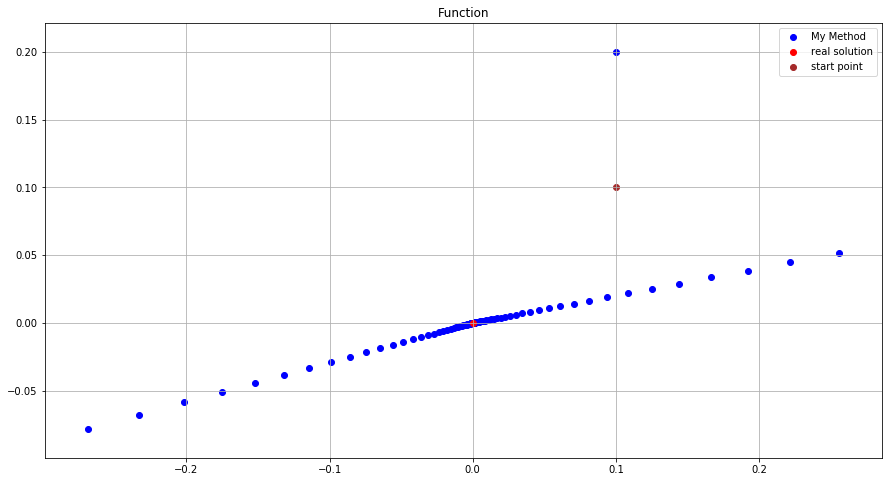

Число итераций: 92


In [36]:
a = []
b = []
for x in x_res:
    a = np.append (a, x[0])
    b = np.append (b, x[1])
fig, ax = plt.subplots(figsize=[15, 8])

plt.scatter(a, b, color = "blue", label = "My Method")
plt.scatter(0.0, 0.0, label = "real solution", color = "red")
plt.scatter(x_start[0], x_start[1], label = "start point", color = "brown")
plt.title("Function")
plt.legend(loc = 'best')
ax.grid('True')
plt.show()

print ('Число итераций:', len(x_res))

# Пример 2. Простой пример, когда всё хорошо

$$ ||Ax - b||_{2}^{2}$$
Градиент этой функции равен
$$ 2 A^{T} (Ax-b)$$

In [37]:
def func(x):
    res = np.linalg.norm((A @ x - b), ord = 2)**2
    return res

In [38]:
def gradient(x) :
    res = 2*A.transpose() @ (A @ x - b)
    return res

In [39]:
#Определим функцию шага h_i = 1/k

def step(i):
    return 0.05

#Если брать шаг 1/k, то решение сходится к неверному ответу

In [40]:
A = np.array([[2, 2], [1, 3]])
b = np.array([1, 1])
x_start = np.array([0.1, 0.1])
eps = 0.0001

In [41]:
res = minimize(func, np.array([0.1, 0.2]), method='BFGS')
print (res.x) #минимум в точке (0.25, 0.25)

[0.25000001 0.24999999]


In [42]:
x_res = DoDual(gradient, eps , step, x_start)
print (x_res)
#решение сошлось к нужной точке

[array([0.1, 0.1]), array([0.18, 0.3 ]), array([0.18 , 0.284]), array([0.1912, 0.2888]), array([0.19344, 0.27952]), array([0.201056, 0.280736]), array([0.2040128, 0.27504  ]), array([0.2094784 , 0.27467904]), array([0.21246387, 0.27096141]), array([0.21655895, 0.26998687]), array([0.21928867, 0.26741267]), array([0.22245546, 0.26627413]), array([0.22483584, 0.26439894]), array([0.22733866, 0.26329523]), array([0.22936267, 0.26187437]), array([0.23136928, 0.26088382]), array([0.23306596, 0.25977636]), array([0.23468953, 0.25892092]), array([0.23610012, 0.25804105]), array([0.23742132, 0.2573176 ]), array([0.23858834, 0.25660979]), array([0.23966732, 0.25600522]), array([0.24063   , 0.25543131]), array([0.24151308, 0.2549296 ]), array([0.24230582, 0.25446196]), array([0.24302954, 0.25404734]), array([0.24368163, 0.25366512]), array([0.24427523, 0.25332332]), array([0.24481129, 0.25301034]), array([0.24529841, 0.25272899]), array([0.24573891, 0.25247242]), array([0.24613876, 0.25224104]),

In [43]:
a = []
b = []
for x in x_res:
    a = np.append (a, x[0])
    b = np.append (b, x[1])

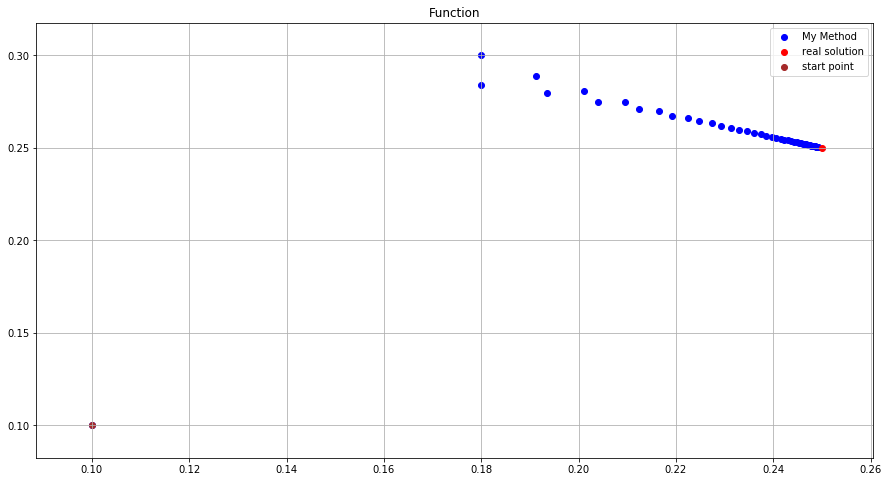

Число итераций: 48


In [44]:
fig, ax = plt.subplots(figsize=[15, 8])

plt.scatter(a, b, color = "blue", label = "My Method")
plt.scatter(0.25, 0.25, label = "real solution", color = "red")
plt.scatter(x_start[0], x_start[1], label = "start point", color = "brown")
plt.title("Function")
plt.legend(loc = 'best')
ax.grid('True')
plt.show()

print ('Число итераций:', len(x_res))

# Вывод:

Был реализован метод двойственных усреднений, исследован на сходимость и характер приближения к решению на выпуклом множестве $Q = \mathbb{R}^{n}$

где шаг метода:

$$ x_{k+1} = argmin_{\mathbb{R}^{n}} \{ d(x) + <\sum_{i=1}^{k} h_i \nabla f(x_i), x>\}$$

и $d(x) = \frac{1}{2} \sum_{i=0}^{n} x_{i}^{2}$ -- прокс-функция.


Мы исследовали сходимость для функции вида $$ ||Ax - b||_{2}^{2} - \lambda_{min} (A^{T}A) \cdot \frac{1}{2}||x||_{2}^{2}$$ на множестве $Q = \mathbb{R}^{n}$.